In [65]:
import numpy as np
import matplotlib.pyplot as plt

entradas = np.array([[0,0], [0,1], [1,0], [1,1]])
saidas = np.array([[1], [0], [0], [1]])

entradas = entradas.T
saidas = saidas.T

epoch = 2000
tda = 0.2

bj = [[0.5], [0.5], [0.5]]
bk = 0.5

np.random.seed(7)
wij = np.random.normal(0.0, pow(3, -0.5), (2,3))
wjk = np.random.normal(0.0, pow(3, -0.5), (3,1))

sig = lambda z: 1 / (1+np.exp(-z))
funAux = lambda x: x*(1-x)

In [66]:
itr = []
margem_erro = []

for i in range(epoch):
    saidas_i = entradas
    target = saidas

    entradas_j = np.dot(wij.T, saidas_i) + bj
    saidas_j = sig(entradas_j)

    entradas_k = np.dot(wjk.T, saidas_j) + bk
    saida_rna = sig(entradas_k)

    erroRNA = target - saida_rna
    mediaAbsoluta = np.mean(np.abs(erroRNA))

    erroCamadaj = np.dot(wjk,erroRNA)

    deltaCamadak = funAux(saida_rna)
    deltaCamadak = erroRNA * deltaCamadak
    gradE_Wjk = (-1) * np.dot(deltaCamadak,saidas_j.T)
    Delta_Wjk = (-1) * tda * gradE_Wjk
    wjk = wjk + Delta_Wjk.T
    bk = bk + tda * np.sum(deltaCamadak)

    deltaCamadaj = funAux(saidas_j)
    deltaCamadaj = erroCamadaj * deltaCamadaj
    gradE_Wij = (-1) * np.dot(deltaCamadaj,saidas_i.T)
    Delta_Wij = (-1) * tda * gradE_Wij
    wij = wij + Delta_Wij.T
    bj = bj + tda * np.sum(deltaCamadaj)

    itr.append(i)
    margem_erro.append(mediaAbsoluta)  


print("Resultados apresentados pela RNA da Função de Equivalência:", saida_rna)
print("Resultados esperados:", target)

print("\nPesos sinápticos finais em wIH:\n", wij)
print("\nPesos sinápticos finais em wOH:\n", wjk)
print("\nBias camada j:\n", bj)
print("\nBias camada k:", bk)




Resultados apresentados pela RNA da Função de Equivalência: [[0.90693583 0.07943995 0.07941895 0.9159895 ]]
Resultados esperados: [[1 0 0 1]]

Pesos sinápticos finais em wIH:
 [[10.83342876  0.20433596  4.77301535]
 [10.83401568 -0.9040372   4.77258202]]

Pesos sinápticos finais em wOH:
 [[-5.34787277]
 [-0.92059127]
 [ 5.98924521]]

Bias camada j:
 [[-7.21088928]
 [-7.21088928]
 [-7.21088928]]

Bias camada k: 2.277529663779707


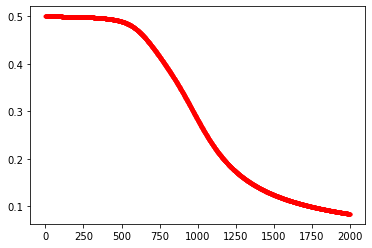

In [67]:
plt.plot(itr, margem_erro, color='red', marker='o',linestyle='dashed',linewidth=2, markersize=3)
plt.show()